# How to deal with large image files
## Image Datasets
## 1. Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image

from matplotlib.pyplot import imshow
from IPython.display import HTML

In [2]:
print(os.listdir('C:\Python\Whale'))

['sample_submission.csv', 'test', 'test.zip', 'train', 'train.csv', 'train.zip']


In [3]:
img_train_path = os.path.abspath('C:\Python\Whale/train')
img_test_path = os.path.abspath('C:\Python\Whale/test')
csv_train_path = os.path.abspath('C:\Python\Whale/train.csv')

csv_train_path

'C:\\Python\\Whale\\train.csv'

## 2. How to load the dataset
### 2.1 Load dataset

In [17]:
df = pd.read_csv(csv_train_path)
df.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [28]:
df['Id'].value_counts()

new_whale    9664
w_23a388d      73
w_9b5109b      65
w_9c506f6      62
w_0369a5c      61
w_700ebb4      57
w_3de579a      54
w_564a34b      51
w_fd3e556      50
w_88e4537      49
w_2b069ba      48
w_d405854      47
w_f0fe284      45
w_789c969      45
w_5e8e218      40
w_778e474      40
w_343f088      40
w_5a2634c      37
w_60ce6fc      37
w_a9304b9      37
w_6822dbc      36
w_af367c3      35
w_f765256      34
w_1ca9ab1      34
w_17b0d3a      33
w_d72771c      32
w_6cda039      31
w_08630fd      31
w_8c25681      31
w_51fc1fc      30
             ... 
w_56fcc39       1
w_c9d479f       1
w_0fb38fe       1
w_f382f59       1
w_3e34a5f       1
w_1da3327       1
w_b0f07c7       1
w_c9628f2       1
w_68311ed       1
w_2f8895a       1
w_aae547d       1
w_1f1774e       1
w_1ff111d       1
w_8947728       1
w_f94d9bb       1
w_9800d65       1
w_ba01717       1
w_4f14413       1
w_efaba3b       1
w_bd06bf9       1
w_911384a       1
w_e76dcfe       1
w_e329a65       1
w_6caa59f       1
w_3e59d84 

### 2.2 Add column
If we add Image_path column which is joined according to their Image-ID, It is more helpful.

In [5]:
df['Image_path'] = [os.path.join(img_train_path, whale) for whale in df['Image']]

In [6]:
df.head()

,Image,Id,Image_path
0,0000e88ab.jpg,w_f48451c,C:\Python\Whale\train\0000e88ab.jpg
1,0001f9222.jpg,w_c3d896a,C:\Python\Whale\train\0001f9222.jpg
2,00029d126.jpg,w_20df2c5,C:\Python\Whale\train\00029d126.jpg
3,00050a15a.jpg,new_whale,C:\Python\Whale\train\00050a15a.jpg
4,0005c1ef8.jpg,new_whale,C:\Python\Whale\train\0005c1ef8.jpg


### 2.3  Random samples

In [7]:
full_path_random_whales = np.random.choice(df['Image_path'], 5)

In [8]:
full_path_random_whales

array(['C:\\Python\\Whale\\train\\a5579f5cd.jpg',
       'C:\\Python\\Whale\\train\\f1887921d.jpg',
       'C:\\Python\\Whale\\train\\4fe66198b.jpg',
       'C:\\Python\\Whale\\train\\ea65c1684.jpg',
       'C:\\Python\\Whale\\train\\b0b62d888.jpg'], dtype=object)

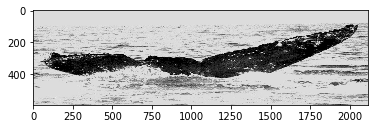

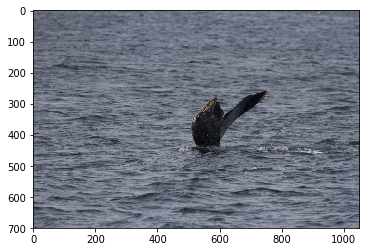

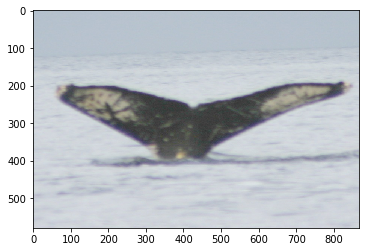

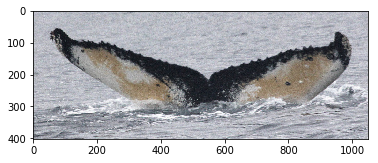

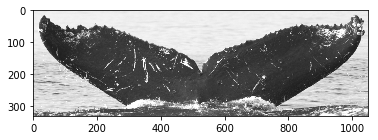

In [9]:
%matplotlib inline
for whale in full_path_random_whales:
    img = Image.open(whale)
    plt.imshow(img)
    plt.show()

## 3. Preprocessing the data
##### Using python OpenCV
which is great computer vision library. I'll use this to scale and convert to gray scale.

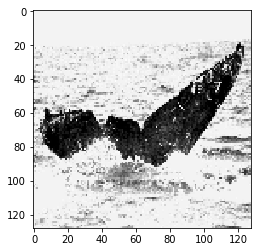

In [10]:
img = cv2.imread(full_path_random_whales[0])
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
res = cv2.resize(img, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
plt.imshow(res, cmap='gray')
plt.show()

##### Using torchvision
which provides
- Convert to grayscale
- Resize
- Corp
- Transform to tensor
- Normalize

In [11]:
from torchvision import transforms

In [12]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std = [0.229, 0.224, 0.225])

preprocess = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                 transforms.Resize(128),
                                 transforms.CenterCrop(128),
                                 transforms.ToTensor(),
                                 normalize])

imgs = [Image.open(whale) for whale in full_path_random_whales]

imgs_tensor = [preprocess(whale) for whale in imgs]

In [13]:
imgs_tensor[0].shape

torch.Size([1, 128, 128])

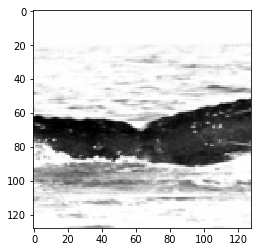

In [14]:
img = imgs_tensor[0]
plt.imshow(img[0], cmap='gray')
plt.show()

### 3.* Encoding

In [15]:
unique_classes = pd.unique(df['Id'])
encoding = dict(enumerate(unique_classes))
encoding = {value: key for key, value in encoding.items()}
df = df.replace(encoding)

In [16]:
df.head()

,Image,Id,Image_path
0,0000e88ab.jpg,0,C:\Python\Whale\train\0000e88ab.jpg
1,0001f9222.jpg,1,C:\Python\Whale\train\0001f9222.jpg
2,00029d126.jpg,2,C:\Python\Whale\train\00029d126.jpg
3,00050a15a.jpg,3,C:\Python\Whale\train\00050a15a.jpg
4,0005c1ef8.jpg,3,C:\Python\Whale\train\0005c1ef8.jpg
